In [361]:
import pandas as pd
import numpy as np
import geopandas as gpd
import contextily as ctx
import fiona
from shapely.geometry import Point, LineString, Polygon
from matplotlib import pyplot as plt
import json

In [372]:
df = pd.read_csv('PopulationProjections.csv')
#df.head(5)

In [364]:
county_totals = df.loc[(df['Category'] == 'Total') & (df['Jurisdiction'] != 'State of Maryland') &  ((df['Year'] == 2010) | (df['Year'] == 2045))]

county_totals.loc[:,'young_population'] = county_totals["0-4"] + county_totals["5-9"] + county_totals["10-14"] + county_totals["15-19"]
#county_totals

In [365]:
county_totals = county_totals[['Jurisdiction', 'Year','young_population']]
#county_totals

In [366]:
county_totals.sort_values("Jurisdiction", ascending = True, inplace = True) 
county_totals = county_totals.pivot_table('young_population', 'Jurisdiction', 'Year')
#county_totals

In [367]:
percent_change = (county_totals.iloc[:,1] - county_totals.iloc[:,0]) / (county_totals.iloc[:,0])
#percent_change

In [368]:
fname = "maryland-counties.geojson"
df = gpd.read_file(fname)

In [369]:
b, c = df.iloc[3].copy(), df.iloc[2].copy()
df.iloc[3],df.iloc[2] = c,b

In [370]:
df['percent_change'] = percent_change.to_numpy()

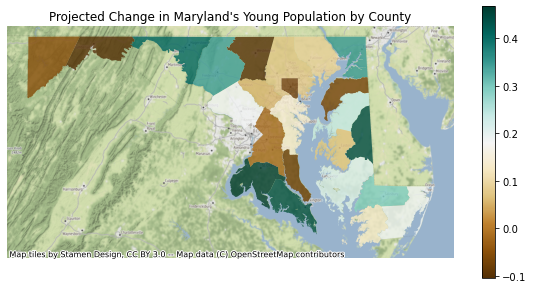

In [371]:
counties = df.to_crs(epsg=3857).plot(figsize=(10,5),alpha = 0.8, column = 'percent_change',cmap='BrBG', legend ='True')
plt.title("Projected Change in Maryland's Young Population by County") 
ctx.add_basemap(counties)
counties.set_axis_off()